In [257]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [258]:
df=pd.read_csv("/content/delivery_time.csv")
df


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [259]:
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [261]:
df.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [262]:
df.isnull().sum()

delivery_time    0
sorting_time     0
dtype: int64

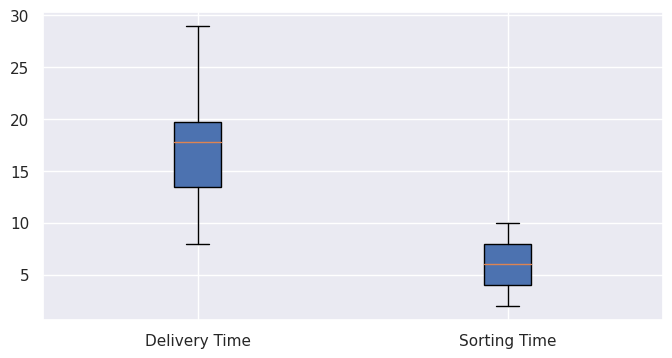

In [263]:
plt.boxplot(df,patch_artist=True,labels=['Delivery Time','Sorting Time'])
plt.show()

<ipython-input-264-5d0ef2c3c5b2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['delivery_time'],ax=axes[0])
<ipython-input-264-5d0ef2c3c5b2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["sorting_time"],ax=axes[1])


<Axes: xlabel='sorting_time', ylabel='Density'>

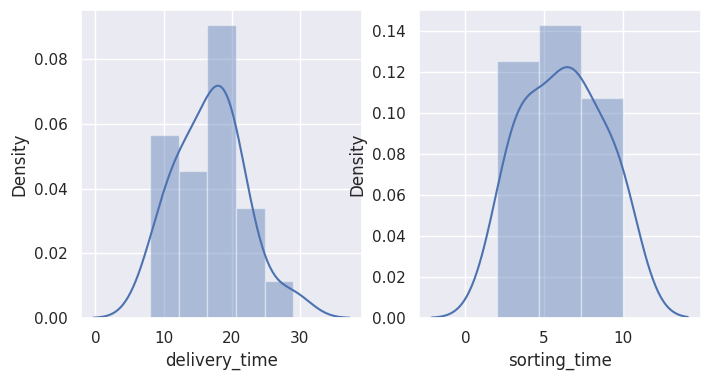

In [264]:
fig,axes=plt.subplots(1,2)
sns.distplot(df['delivery_time'],ax=axes[0])
sns.distplot(df["sorting_time"],ax=axes[1])



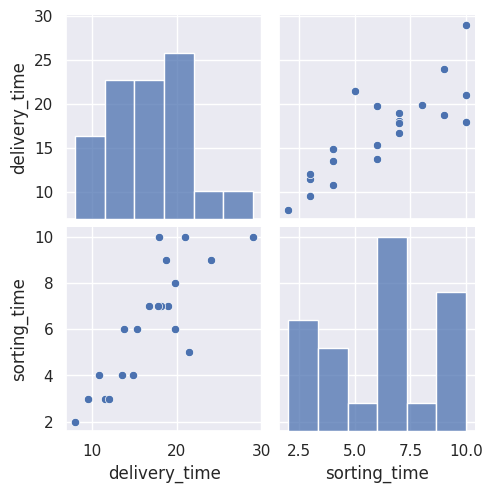

In [265]:
sns.pairplot(df)

In [266]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: xlabel='sorting_time', ylabel='delivery_time'>

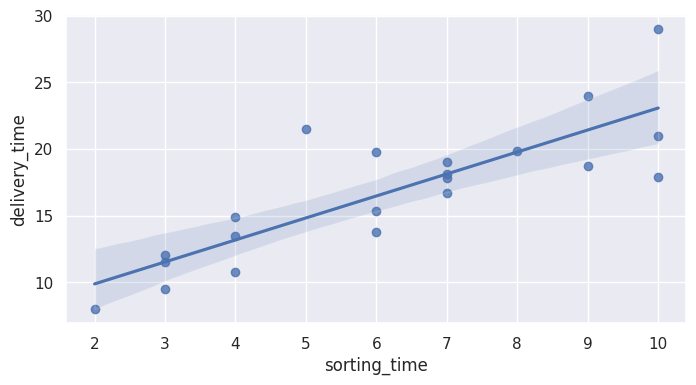

In [267]:
sns.regplot(x=df['sorting_time'],y=df['delivery_time'])

In [268]:
model = smf.ols("delivery_time~sorting_time", data=df).fit()

In [269]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 07 May 2023   Prob (F-statistic):           3.98e-06
Time:                        16:20:39   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [270]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [271]:
delivery_time = (6.582734) + (1.649020)*(10)
delivery_time

23.072933999999997

In [272]:
new_df=pd.Series([5,8,10])
new_df

0     5
1     8
2    10
dtype: int64

In [274]:
data_pred=pd.DataFrame(new_df,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8
2,10


In [275]:
model.predict(data_pred)

0    14.827833
1    19.774893
2    23.072933
dtype: float64